# Base de dades MySQL

In [1]:
import mysql.connector
import pandas as pd
import seaborn as sns

# Exercici 1

Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python

Crearem una base de dades amb dues taules: Empleats i Departaments, tal i com es pot veure en la següent imatge:

![base dades](base_dades.jpg)

Utilitzarem el següent codi SQL per construir la base de dades i les taules amb les relacions corresponents:

```sql
-- -----------------------------------------------------
-- Schema mydb
-- -----------------------------------------------------
CREATE SCHEMA mydb;

-- -----------------------------------------------------
-- Table mydb.Departament
-- -----------------------------------------------------
CREATE TABLE mydb.Departament (
  idDepartament INT NOT NULL,
  Nom VARCHAR(45) NOT NULL,
  Descripcio VARCHAR(200) NULL,
  PRIMARY KEY (idDepartament))

-- -----------------------------------------------------
-- Table mydb.Empleat
-- -----------------------------------------------------
CREATE TABLE mydb.Empleat (
  DNI INT NOT NULL,
  Nom VARCHAR(45) NOT NULL,
  Cognoms VARCHAR(45) NOT NULL,
  Posicio VARCHAR(45) NOT NULL,
  Salari INT NOT NULL,
  Departament INT NOT NULL,
  PRIMARY KEY (DNI),
  CONSTRAINT Departament
    FOREIGN KEY (Departament)
    REFERENCES mydb.Departament (idDepartament))

```

Introduim unes dades:

```sql
-- -----------------------------------------------------
-- Data for table mydb.Departament
-- -----------------------------------------------------
START TRANSACTION;
INSERT INTO mydb.Departament (`idDepartament`, `Nom`, `Descripcio`) VALUES (1, 'Finances', 'Finances i Comptabilitat');
INSERT INTO mydb.Departament (`idDepartament`, `Nom`, `Descripcio`) VALUES (2, 'Marqueting', 'Marqueting i Ventes');
INSERT INTO mydb.Departament (`idDepartament`, `Nom`, `Descripcio`) VALUES (3, 'IT', 'Informàtica');
COMMIT;

-- -----------------------------------------------------
-- Data for table mydb.Empleat
-- -----------------------------------------------------
START TRANSACTION;
INSERT INTO mydb.Empleat (`DNI`, `Nom`, `Cognoms`, `Posicio`, `Salari`, `Departament`) VALUES (46112233, 'Maria', 'González de la Campa', 'Accountant', 45000, 1);
INSERT INTO mydb.Empleat (`DNI`, `Nom`, `Cognoms`, `Posicio`, `Salari`, `Departament`) VALUES (46112244, 'Javier', 'Romero Arcas', 'Financial manager', 55000, 1);
INSERT INTO mydb.Empleat (`DNI`, `Nom`, `Cognoms`, `Posicio`, `Salari`, `Departament`) VALUES (46112255, 'Ana', 'Fernández Gutierrez', 'Marketing', 42000, 2);
INSERT INTO mydb.Empleat (`DNI`, `Nom`, `Cognoms`, `Posicio`, `Salari`, `Departament`) VALUES (46112266, 'Luis', 'Nuñez Cuesta', 'Sales', 47000, 2);
INSERT INTO mydb.Empleat (`DNI`, `Nom`, `Cognoms`, `Posicio`, `Salari`, `Departament`) VALUES (46112277, 'Marta', 'Viejo Campoamor', 'Software Engineer', 50000, 3);
INSERT INTO mydb.Empleat (`DNI`, `Nom`, `Cognoms`, `Posicio`, `Salari`, `Departament`) VALUES (46112288, 'David', 'Sanchez Abad', 'DevOps', 60000, 3);
COMMIT;
```

Ara ja ens podem conectar des de Python i extreure les dades:

In [2]:
mydb = mysql.connector.connect(
    host="localhost",
    user="test",
    password="password",
    database="mydb"
)

In [3]:
mycursor = mydb.cursor()

In [4]:
mycursor.execute("SELECT * FROM mydb.Departament;")

In [5]:
mycursor.fetchall()

[(1, 'Finances', 'Finances i Comptabilitat'),
 (2, 'Marqueting', 'Marqueting i Ventes'),
 (3, 'IT', 'Informàtica')]

In [6]:
mycursor.execute("SELECT * FROM mydb.Empleat;")

In [7]:
mycursor.fetchall()

[(46112233, 'Maria', 'González de la Campa', 'Finances', 40000, 1),
 (46112244, 'Javier', 'Romero Arcas', 'Financial manager', 55000, 1),
 (46112255, 'Ana', 'Fernández Gutierrez', 'Marketing', 42000, 2),
 (46112266, 'Luis', 'Nuñez Cuesta', 'Sales', 47000, 2),
 (46112277, 'Marta', 'Viejo Campoamor', 'Software Engineer', 50000, 3),
 (46112288, 'David', 'Sanchez Abad', 'DevOps', 60000, 3)]

# Exercici 2

Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe.

In [8]:
query = '''
SELECT Nom, Cognoms, Salari
FROM Empleat
WHERE Salari >= 50000
'''

In [9]:
mycursor.execute(query)

In [10]:
empleats_salari_mes50K = pd.DataFrame(mycursor.fetchall(), columns=['Nom', 'Cognoms', 'Salari'])

In [11]:
empleats_salari_mes50K

,Nom,Cognoms,Salari
0,Javier,Romero Arcas,55000
1,Marta,Viejo Campoamor,50000
2,David,Sanchez Abad,60000


In [12]:
query = '''
SELECT E.Nom, E.Cognoms, E.Posicio, E.Salari, D.Nom
FROM Empleat AS E
INNER JOIN Departament AS D
ON E.Departament = D.idDepartament;'''

In [13]:
mycursor.execute(query)

In [14]:
data = pd.DataFrame(mycursor.fetchall(), columns=['Nom', 'Cognoms', 'Posició', 'Salari', 'Departament'])

In [15]:
data

,Nom,Cognoms,Posició,Salari,Departament
0,Maria,González de la Campa,Finances,40000,Finances
1,Javier,Romero Arcas,Financial manager,55000,Finances
2,Ana,Fernández Gutierrez,Marketing,42000,Marqueting
3,Luis,Nuñez Cuesta,Sales,47000,Marqueting
4,Marta,Viejo Campoamor,Software Engineer,50000,IT
5,David,Sanchez Abad,DevOps,60000,IT


In [16]:
query = '''
SELECT D.Nom, AVG(E.Salari)
FROM Empleat AS E
INNER JOIN Departament AS D
ON E.Departament = D.idDepartament
GROUP BY E.Departament
'''

In [17]:
mycursor.execute(query)

In [18]:
salari_mitja_departament = pd.DataFrame(mycursor.fetchall(), columns=['Departament', 'Salari Mitjà'])

In [19]:
salari_mitja_departament

,Departament,Salari Mitjà
0,Finances,47500.0000
1,Marqueting,44500.0000
2,IT,55000.0000


# Exercici 3

Genera algun gràfic que resumeixi les dades. 

<AxesSubplot:xlabel='Departament', ylabel='Salari'>

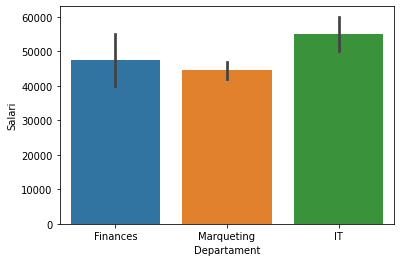

In [20]:
sns.barplot(
    data = data,
    x = 'Departament',
    y = 'Salari'
)